In [1]:
from pl import *
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

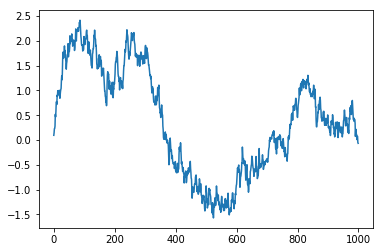

In [2]:
test = bm_basic()
plt.plot(np.arange(1000), test)

Can we use this to generate a bm that switches shape based on realized values? 

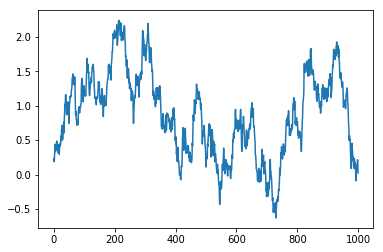

In [3]:
test2 = bm_1switch()
plt.plot(np.arange(1000), test2)

With switching...

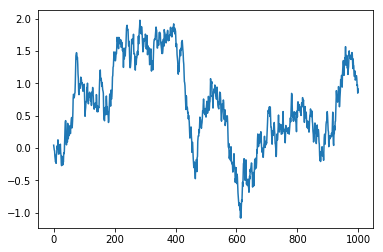

In [4]:
test3 = bm_2switch()
plt.plot(np.arange(1000), test3)

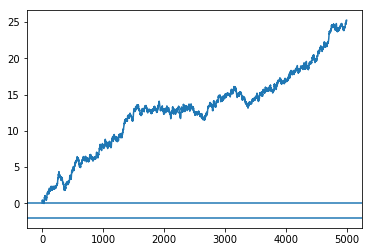

In [5]:
test4 = bm_2switch(n=5000, cut=[0, -2], mus=[.05, -.1])
plt.plot(np.arange(5000), test4)
plt.axhline(0)
plt.axhline(-2)

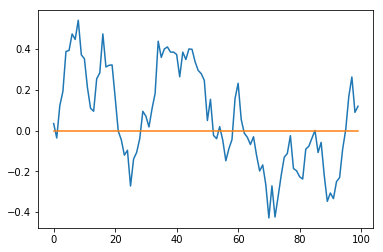

In [6]:
samp_n =100

test5 = bm_basic_d(samp_n)
plt.plot(np.arange(samp_n), test5[0])
plt.plot(np.arange(samp_n), test5[1])

In [7]:
test = lrd(bm_2switch_d, obs=10000, **{"n":250})

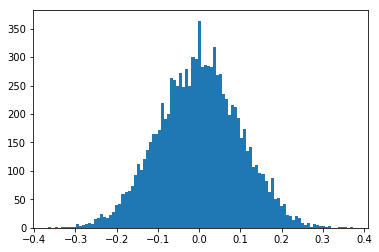

In [8]:
plot = plt.hist(test, bins=100)

In [9]:
def bmv_basic(n=1000, runs= 100, x=0, mu=0, sigma=1, dt=.1):
    vals = np.zeros((runs, n))
    x = np.repeat(x, runs)
    for k in range(n):
        x = x + mu*dt + norm.rvs(size=runs, scale=sigma**2*dt)
        vals[:, k] = x
        
    return vals

In [10]:
vals=np.zeros((10, 100))
x = np.repeat(0, 10)

In [11]:
x = x +.1 + norm.rvs(size=10, scale=1)

In [12]:
sugar = bmv_basic()

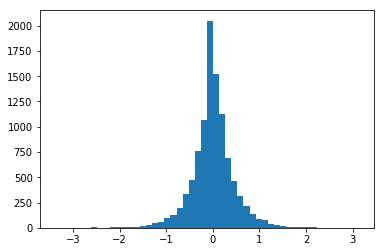

In [25]:
poo = bmv_general(keepall=False, dr = .5, n=10000, runs=10000)
dia0 = plt.hist(poo, bins = 50)

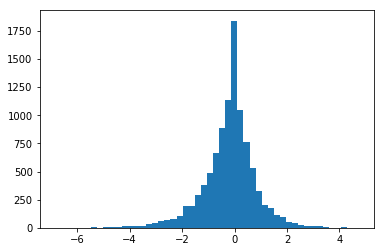

In [26]:
poo = bmv_general(keepall=False, mus=[0, -.1], sigmas=[1, 1.5], cut=[0, -2], dr = .5, n=10000, runs=10000)
dia1 = plt.hist(poo, bins=50)

In [16]:
help(bmv_general)

Help on function bmv_general in module pl:

bmv_general(n=1000, runs=100, x=0, mus=[0, 0], cut=[0, 0], sigmas=[1, 1], dt=0.1, dr=0, keepall=True)
    A general function that simulates Brownian motions in parallel. The brownian motion
    has a range for which agents choose a risky process. This is for values of x in 
    between the upper and lower values in cuts, where the two values of mus and sigmas
    are used (the second applying between the cut points). With this function, we really don't
    need any other heavy machinery as the last column can be used to proxy the long run distribution.
    Moreover, a death rate of 0, and cut points that are equal simulate the usual BM.
    
    The variable last allows one to just keep the last observation. This way, the process can be left running
    for a large amount of time without soaking up storage.



In [34]:
dia0 = list(dia0)
dia1 = list(dia1)

In [40]:
foo = dia1[1] - dia0[1]

In [43]:
foo

array([-3.46200237, -3.36053711, -3.25907184, -3.15760658, -3.05614131,
       -2.95467604, -2.85321078, -2.75174551, -2.65028024, -2.54881498,
       -2.44734971, -2.34588445, -2.24441918, -2.14295391, -2.04148865,
       -1.94002338, -1.83855811, -1.73709285, -1.63562758, -1.53416232,
       -1.43269705, -1.33123178, -1.22976652, -1.12830125, -1.02683598,
       -0.92537072, -0.82390545, -0.72244019, -0.62097492, -0.51950965,
       -0.41804439, -0.31657912, -0.21511386, -0.11364859, -0.01218332,
        0.08928194,  0.19074721,  0.29221248,  0.39367774,  0.49514301,
        0.59660827,  0.69807354,  0.79953881,  0.90100407,  1.00246934,
        1.10393461,  1.20539987,  1.30686514,  1.4083304 ,  1.50979567,
        1.61126094])

In [ ]:


sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)
    
## Plot formatting
#plt.legend(prop={'size': 16}, title = 'Airline')
#plt.title('Density Plot with Multiple Airlines')
#plt.xlabel('Delay (min)')
#plt.ylabel('Density')